<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab9/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#task1

In [233]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
x, y = make_regression(n_samples=10, n_features=10, noise=20, n_informative=2)

In [234]:
PCA(n_components=5).fit_transform(x)

array([[ 1.29741676,  0.45920905, -2.17191631, -0.93422599, -0.02923134],
       [ 2.34655382,  0.70297366,  1.53015535,  1.09417737,  0.69309978],
       [ 0.15674199, -0.24867   ,  1.66293277, -0.85534168, -1.26805749],
       [-1.5270965 , -2.31437684,  0.12676569, -0.63229566,  1.1549701 ],
       [-2.70191595,  0.83041795,  0.74919906,  0.71726498, -0.1652397 ],
       [-1.72428326,  1.03001977, -1.30761115,  0.719206  , -0.70458005],
       [ 0.16737043, -0.59101254, -0.98527551,  1.30308729,  0.28291678],
       [-1.94571374,  0.6681972 ,  0.43993919, -0.94991155,  0.41178698],
       [ 1.79343631, -2.39924225, -0.13125009,  0.25515565, -0.78338505],
       [ 2.13749016,  1.862484  ,  0.08706099, -0.71711641,  0.40771998]])

In [265]:
class myPCA:
  def fit(self, x):
    centered = x - np.mean(x, axis = 0)
    A = (1 / (x.shape[0] - 1)) * centered.T @ centered
    eigenvalues, eigenvectors = np.linalg.eig(A)
    sorted_indices = np.argsort(eigenvalues.astype(float))[::-1]

    self.c = eigenvalues[sorted_indices].astype(float)
    self.vectors = eigenvectors[:, sorted_indices].T
    self.cs = np.cumsum(self.c / np.sum(self.c))
    return self

  def transform(self, x, components: int =None, p = 0.95):
    if components is not None:
      return (x - np.mean(x, axis=0)) @ self.vectors[:components].T
    return (x - np.mean(x, axis=0)) @ self.vectors[:np.argmax(self.cs > p)].T

  def fit_transform(self,x,  components:int=None, p=0.95):
    self.fit(x)
    return self.transform(x, components=components, p=p)

  def picture(self, p=0.95):
    plt.plot(np.arange(1, len(self.cs) + 1), self.cs, marker='o', linestyle='-', color='b')
    plt.axhline(y=p, color='r', linestyle='-')
    plt.grid(True)
    plt.show()


In [257]:
myPCA().fit_transform(x, components=5)

array([[  1.25946645, -21.27488348,   9.46305462,  13.01418869,
          7.12882278],
       [ -7.9576113 ,  20.76869896,  -4.43950604, -14.89366444,
         -5.89624878],
       [ -6.99192297,   9.95598641,  -2.95855808, -12.28830243,
         18.1260233 ],
       ...,
       [-10.8012837 ,   6.96025223,  -5.59955453,  -7.22773348,
          3.45964589],
       [  4.87210009, -12.42395362,  10.17086635,  -6.66885049,
         -3.56906108],
       [  0.34438963,  -6.36554919, -10.77370849,  -7.72621321,
          3.31061536]])

In [39]:
#task2

In [237]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [238]:
mypca = myPCA().fit(x)
model = LogisticRegression(max_iter=1000)

In [239]:
#дтсперсия
mypca.cs

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [240]:
x1c = mypca.transform(x, components=1)
cross_val_score(model, x1c, y, cv =5).mean()

0.9333333333333333

In [241]:
x2c = mypca.transform(x, components=2)
cross_val_score(model, x2c, y, cv =5).mean()

0.96

In [242]:
x3c = mypca.transform(x, components=3)
cross_val_score(model, x3c, y, cv =5).mean()

0.9733333333333334

In [243]:
# 2 оптимально

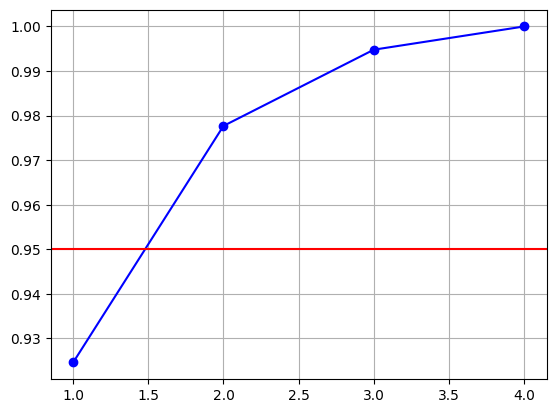

In [244]:
mypca.picture()

In [245]:
#task3

In [246]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [247]:
pca = myPCA().fit(x)

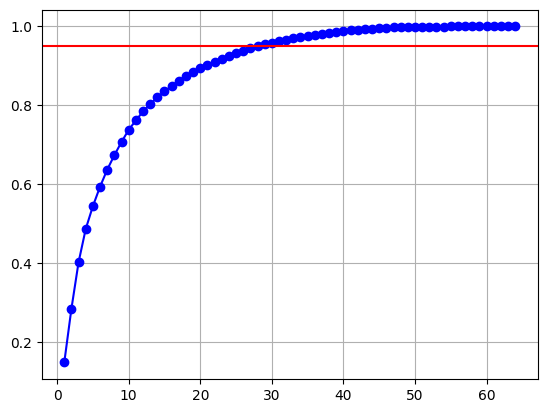

In [248]:
pca.picture()

In [18]:
import pandas as pd
from tqdm.notebook import tqdm

In [19]:
pd.DataFrame(np.array([range(1, 65), pca.cs ,[cross_val_score(model, pca.transform(x, components=component), y, cv=3).mean() for component in tqdm(range(1, 65))]]).T)

  0%|          | 0/64 [00:00<?, ?it/s]

,0,1,2
0,1.0,0.148906,0.364496
1,2.0,0.285094,0.588203
2,3.0,0.403040,0.683361
3,4.0,0.487139,0.773511
4,5.0,0.544964,0.821925
...,...,...,...
59,60.0,1.000000,0.928770
60,61.0,1.000000,0.928214
61,62.0,1.000000,0.928214
62,63.0,1.000000,0.928214


In [20]:
#task 4

In [21]:
from numpy.linalg import svd

class svdPCA:
  def __init__(self):
    pass

  def fit(self, x):
    centered = x - np.mean(x, axis = 0)
    self.u, self.s, self.v = svd(centered)
    return self

  def transform(self, x, components:int=4):
    centured = x - x.mean(axis = 0)
    return centured @ (vt.T[:, : components])

  def fit_transform(self, x, components = 4):
    self.fit(x)
    return self.transform(x, components=components)



In [22]:
x, y = make_regression(n_samples=10, n_features = 5);
centured = x - x.mean(axis=0)

In [23]:
pca = myPCA().fit(x)
svdpca = svdPCA().fit(x)

In [24]:
u, s, vt = svd(centured)

In [25]:
# сингулярные значения это корни из собственных
# главные компоненты хранятся в матрице v
(s / np.linalg.norm(s)) / (np.sqrt(pca.c) / np.linalg.norm(np.sqrt(pca.c)))

array([1., 1., 1., 1., 1.])

In [26]:
pca.fit_transform(x, components = 1)

array([[-0.12372027],
       [ 2.43305924],
       [-1.70240475],
       [-1.84343801],
       [-0.59548797],
       [ 1.15249492],
       [-1.35374185],
       [ 1.18094304],
       [ 0.50315031],
       [ 0.34914536]])

In [27]:
svdpca.transform(x, 1)

array([[ 0.12372027],
       [-2.43305924],
       [ 1.70240475],
       [ 1.84343801],
       [ 0.59548797],
       [-1.15249492],
       [ 1.35374185],
       [-1.18094304],
       [-0.50315031],
       [-0.34914536]])

In [28]:
#task 5

In [48]:
#task 6

In [258]:
import cv2

In [266]:
image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

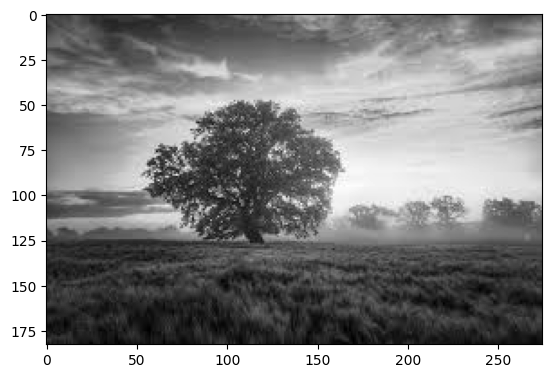

In [267]:
plt.imshow(image, cmap='gray')
plt.show()

In [268]:
class picPCA(myPCA):
  def transform(self, x, components: int = None, p = 0.95):
    mean =  np.mean(x)
    if components is None:
      top_k_vectors = self.vectors.T[:, :np.argmax(self.cs > p)]
    else:
      top_k_vectors = self.vectors.T[:,:components]
    centered = (x - mean)
    projection = (centered @ top_k_vectors)
    return (projection @ top_k_vectors.T) + mean


In [269]:
picpca = picPCA().fit(image)

<ipython-input-265-e0a6ede0088e>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_indices = np.argsort(eigenvalues.astype(float))[::-1]
<ipython-input-265-e0a6ede0088e>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  self.c = eigenvalues[sorted_indices].astype(float)


<ipython-input-274-4f585b8a2939>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = picpca.transform(image, p = 0.99).astype(float)


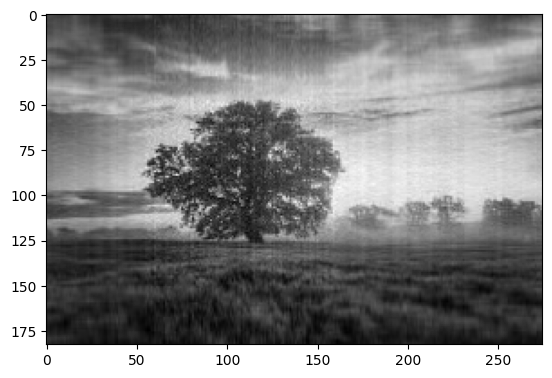

In [274]:
reconstructed_image = picpca.transform(image, p = 0.99).astype(float)
plt.imshow(reconstructed_image, cmap='gray')
plt.show()